In [2]:
!pip install transformers[torch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

In [2]:
from PIL import Image
from IPython.display import display


# **HandWritten Text**

In [3]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [4]:
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.23G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:

def show_image(pathStr):
  img = Image.open(pathStr).convert("RGB")
  display(img)
  return img



In [6]:
def ocr_image(src_img):
  pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = model.generate(pixel_values)
  return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

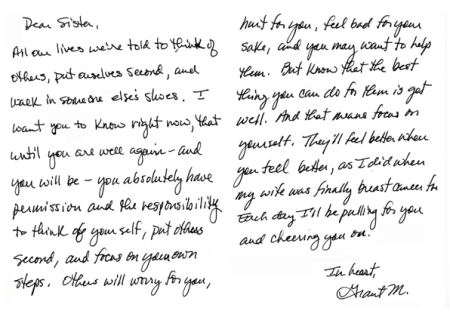

In [8]:
hw_image = show_image('/content/img_trocr.png')

In [9]:
ocr_image(hw_image)

'0 0'

In [10]:
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)


In [11]:
ocr_image(hw_image1)


'Dean Sister , but her you , feel bad for years ,'

In [12]:
hw_image2 = hw_image.crop((0, 40, hw_image.size[0], 60))
display(hw_image2)

In [13]:
ocr_image(hw_image2)

'All our lives were told to thinking . Sake , and you may want to help'

In [14]:
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.5 MB/s eta 0:00:00


1. 📏 Character Error Rate (CER)
Definition:
CER measures the number of incorrect characters between the prediction and the true text.

Formula:

𝐶𝐸𝑅=(Insertions+Deletions+Substitutions)/Total characters in ground truth


​

Interpretation:

CER = 0.00 → perfect prediction
Higher CER → worse recognition (more character mistakes)
Example:
Ground Truth	Predicted Text
Hello world	Helo world
Here, 1 character (l missing) → CER = 1/11 ≈ 0.0909

2. 📏 Word Error Rate (WER)
Definition:
WER measures the number of incorrect words (instead of characters).

Formula:

𝑊𝐸𝑅=(Insertions+Deletions+Substitutions)/Total words in ground truth


Interpretation:

WER = 0.00 → perfect prediction

Higher WER → worse recognition (more word mistakes)

Example:


Ground Truth	Predicted Text
Hello world	Hello wrld
Only 1 word ("world" → "wrld") is wrong → WER = 1/2 = 0.5



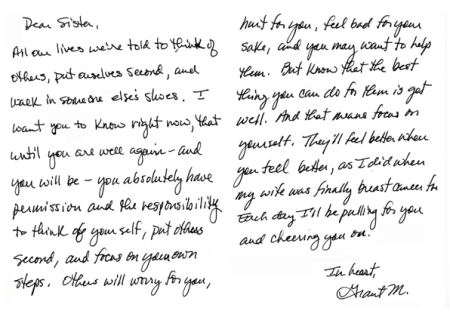

📋 OCR Evaluation Metrics:
✅ Predicted Text: 0 0
✅ Ground Truth Text: Dear Sister,
All our lives we're told to think of others, put ourselves second, and walk in someone else's shoes. I want you to know right now, that with you are were again - and you will be - you absolutely have permission and the responsibility to think of yourself, put others second, and focus on your own steps. Others will worry for you, hurt for you, feel bad for your sake, and you may want to help them. But know that the best thing you can do for them is get well. That means focus on yourself. They'll feel better when you feel better, as I did when my wife was finally breast cancer. Each day, I'll be pulling for you and cheering you on.

In heart,
Stuart M.
🚀 Character Error Rate (CER): 0.9985
🚀 Word Error Rate (WER): 1.0000


In [16]:
from jiwer import cer, wer

# --- Load your handwritten image ---
hw_image = show_image('/content/img_trocr.png')

# --- OCR output ---
predicted_text = ocr_image(hw_image)

# --- YOUR Ground Truth Text ---
ground_truth_text = """Dear Sister,
All our lives we're told to think of others, put ourselves second, and walk in someone else's shoes. I want you to know right now, that with you are were again - and you will be - you absolutely have permission and the responsibility to think of yourself, put others second, and focus on your own steps. Others will worry for you, hurt for you, feel bad for your sake, and you may want to help them. But know that the best thing you can do for them is get well. That means focus on yourself. They'll feel better when you feel better, as I did when my wife was finally breast cancer. Each day, I'll be pulling for you and cheering you on.

In heart,
Stuart M."""

# --- Evaluate ---
cer_score = cer(ground_truth_text, predicted_text)
wer_score = wer(ground_truth_text, predicted_text)

print(f"📋 OCR Evaluation Metrics:")
print(f"✅ Predicted Text: {predicted_text}")
print(f"✅ Ground Truth Text: {ground_truth_text}")
print(f"🚀 Character Error Rate (CER): {cer_score:.4f}")
print(f"🚀 Word Error Rate (WER): {wer_score:.4f}")


In [17]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch

# 3. Load the pre-trained TrOCR model for handwritten text
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

# 4. Load your handwritten image
image_path = "/content/img_trocr.png"  # Replace this with your file path
image = Image.open(image_path).convert("RGB")

# 5. Preprocess the image
pixel_values = processor(images=image, return_tensors="pt").pixel_values

# 6. Generate text using the model
model.eval()
with torch.no_grad():
    generated_ids = model.generate(pixel_values)
    extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# 7. Print the extracted text
print("📝 Extracted Text:\n")
print(extracted_text)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

📝 Extracted Text:

0 0


In [18]:
extracted_text

'0 0'

# **Printed text**

In [19]:
printed_processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-printed')
printed_model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-printed')

def ocr_printed_image(src_img):
  pixel_values = printed_processor(images=src_img, return_tensors="pt").pixel_values
  generated_ids = printed_model.generate(pixel_values)
  return printed_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

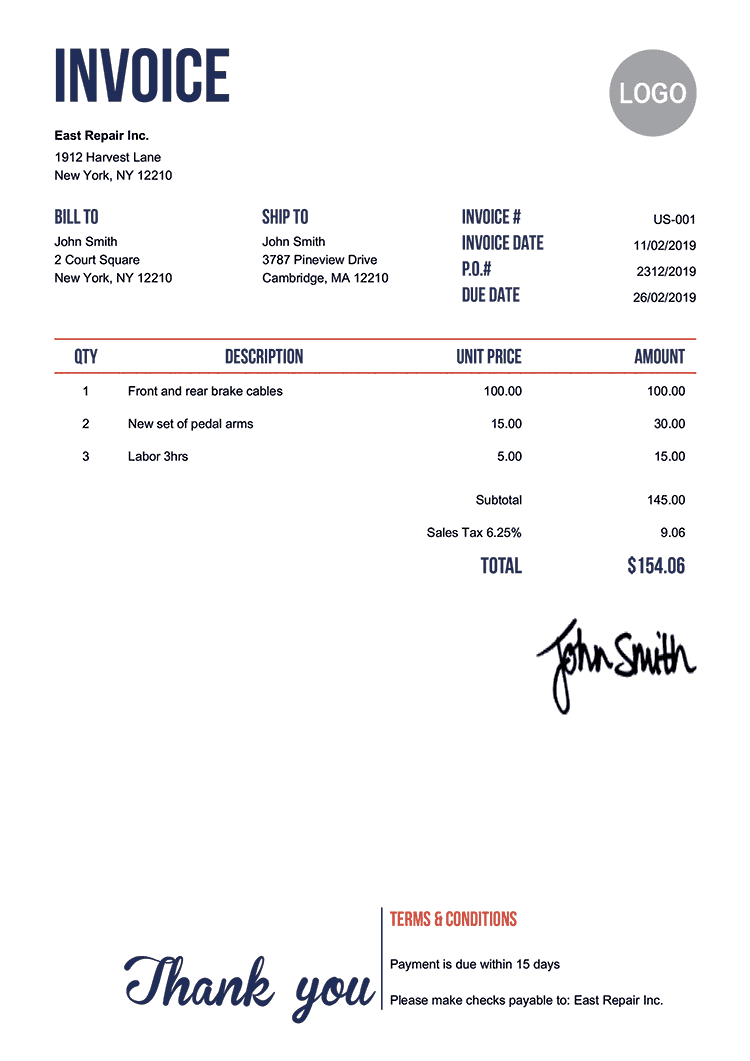

In [21]:
invoice_image = show_image('/content/img_trocr_printed.png')

In [22]:
invoice_image1 = invoice_image.crop((0, 200, invoice_image.size[0], 225))
display(invoice_image1)

In [23]:
ocr_printed_image(invoice_image1)

'BILL BY SHPT NOICE: USH'

In [24]:
invoice_image2 = invoice_image.crop((0, 230, invoice_image.size[0], 250))
display(invoice_image2)

In [25]:
ocr_printed_image(invoice_image2)

'JOH SHIM NO. JOH SHIMH INVOICE DATE 102909'

In [31]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def evaluate_ocr(model, processor, images, ground_truth):
    """
    Evaluates the OCR model by comparing its output to the ground truth.

    Args:
        model: The OCR model.
        processor: The processor to pre-process images.
        images: List of images to process.
        ground_truth: List of ground truth texts for the images.

    Returns:
        accuracy: The accuracy of the OCR model on the input images.
        f1: The F1 score of the OCR model.
    """
    predicted_texts = []

    for img in images:
        # Process and generate OCR output
        pixel_values = processor(images=img, return_tensors="pt").pixel_values
        generated_ids = model.generate(pixel_values)
        predicted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        predicted_texts.append(predicted_text)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(ground_truth, predicted_texts)
    f1 = f1_score(ground_truth, predicted_texts, average='weighted')  # 'weighted' average to account for class imbalance

    return accuracy, f1

# Example usage
invoice_images = [invoice_image1, invoice_image2]  # Add more images if needed
ground_truth_texts = [
    "BILLTO  SHIPTO INVOICE US001",
    "JOHN SMITH JOHN SMITH INVOICE DATE 11/02/2019"
]  # Provide the actual text that should be extracted from the images

accuracy, f1 = evaluate_ocr(printed_model, printed_processor, invoice_images, ground_truth_texts)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.00
F1 Score: 0.00


# **Pdf Document**

In [32]:
!pip install datasets torch torchvision pdf2image pytesseract pillow
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [33]:
# Install necessary libraries (only need to run once)
# pip install transformers pdf2image torch torchvision pillow

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from pdf2image import convert_from_path
from PIL import Image
import torch

# 1. Load TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

# 2. Convert PDF to images (one image per page)
pdf_path = '/content/NLP_research.pdf'  # <-- Use your uploaded file
pages = convert_from_path(pdf_path, dpi=300)  # Higher dpi = better quality

# 3. OCR Each Page
extracted_text = []

for idx, page in enumerate(pages):
    print(f"Processing Page {idx+1}/{len(pages)}...")

    # Convert page to RGB
    image = page.convert("RGB")

    # Preprocess the image
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # Generate text
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    extracted_text.append(generated_text)

# 4. Combine all extracted text
full_text = "\n\n".join(extracted_text)

# 5. Save to a text file
output_path = '/content/NLP_research_extracted.txt'
with open(output_path, "w", encoding="utf-8") as f:
    f.write(full_text)

print(f"✅ Extraction complete! Text saved to: {output_path}")


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

Processing Page 1/34...
Processing Page 2/34...
Processing Page 3/34...
Processing Page 4/34...
Processing Page 5/34...
Processing Page 6/34...
Processing Page 7/34...
Processing Page 8/34...
Processing Page 9/34...
Processing Page 10/34...
Processing Page 11/34...
Processing Page 12/34...
Processing Page 13/34...
Processing Page 14/34...
Processing Page 15/34...
Processing Page 16/34...
Processing Page 17/34...
Processing Page 18/34...
Processing Page 19/34...
Processing Page 20/34...
Processing Page 21/34...
Processing Page 22/34...
Processing Page 23/34...
Processing Page 24/34...
Processing Page 25/34...
Processing Page 26/34...
Processing Page 27/34...
Processing Page 28/34...
Processing Page 29/34...
Processing Page 30/34...
Processing Page 31/34...
Processing Page 32/34...
Processing Page 33/34...
Processing Page 34/34...
✅ Extraction complete! Text saved to: /content/NLP_research_extracted.txt


In [34]:
!pip install PyPDF2

In [35]:
from transformers import VisionEncoderDecoderModel, TrOCRProcessor, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import Dataset
from pdf2image import convert_from_path
from PyPDF2 import PdfReader
import torch

# Step 1: Load PDF and extract image-text pairs
pdf_path = "/content/NLP_research.pdf"
images = convert_from_path(pdf_path, dpi=300)
texts = [p.extract_text() for p in PdfReader(pdf_path).pages]

# Step 2: Filter usable pages (non-empty text)
examples = [{"image": img, "text": txt} for img, txt in zip(images, texts) if txt]

# Step 3: Initialize processor and model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id



# Step 4: Prepare dataset
def preprocess(example):
    # Process image
    pixel_values = processor(images=example["image"], return_tensors="pt").pixel_values[0]

    # Process text
    labels = processor.tokenizer(example["text"], return_tensors="pt", padding="max_length", truncation=True).input_ids[0]

    return {
        "pixel_values": pixel_values,
        "labels": labels
    }





Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [36]:
dataset = Dataset.from_list(examples)
dataset = dataset.map(preprocess, remove_columns=["image", "text"])


Map:   0%|          | 0/34 [00:00<?, ? examples/s]

In [37]:

# Step 5: Training Arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./trocr_finetuned_pdf",
    per_device_train_batch_size=1,
    predict_with_generate=True,
    logging_steps=5,
    save_total_limit=1,
    num_train_epochs=3,
    learning_rate=5e-5,
    fp16=torch.cuda.is_available(),
    report_to="none"
)

# Step 6: Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    tokenizer=processor.feature_extractor,
)



/usr/local/lib/python3.11/dist-packages/transformers/models/trocr/processing_trocr.py:152: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(
<ipython-input-37-80544b320846>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [38]:
# Step 7: Train
trainer.train()

# Step 8: Save
model.save_pretrained("./trocr_finetuned_pdf")
processor.save_pretrained("./trocr_finetuned_pdf")

print("✅ Fine-tuning complete. Model saved to ./trocr_finetuned_pdf")


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss


KeyboardInterrupt: 

Latency

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout

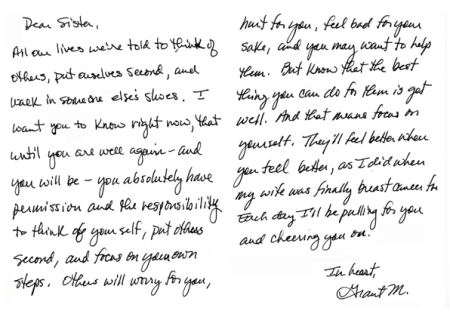

Latency: 8.8692 seconds


Latency: 18.8693 seconds


In [1]:
!pip install transformers[torch]
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from IPython.display import display
import time

# Load the model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten")

# Function to display image
def show_image(pathStr):
    img = Image.open(pathStr).convert("RGB")
    display(img)
    return img

# Function to perform OCR and measure latency
def ocr_image(src_img):
    # Start measuring time
    start_time = time.time()

    # Perform OCR
    pixel_values = processor(images=src_img, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    result = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Measure elapsed time
    end_time = time.time()
    latency = end_time - start_time

    # Print the latency and the OCR result
    print(f"Latency: {latency:.4f} seconds")
    return result

# Show image and perform OCR on it
hw_image = show_image('/content/img_trocr.png')
ocr_result = ocr_image(hw_image)

# Crop image and perform OCR on cropped part
hw_image1 = hw_image.crop((0, 10, hw_image.size[0], 40))
display(hw_image1)
ocr_result1 = ocr_image(hw_image1)

# You can add further image processing like this if needed
# hw_image2 = hw_image.crop((0, 50, hw_image.size[0], 90))
# display(hw_image2)
# ocr_result2 = ocr_image(hw_image2)
